<h1> Unit 5 | Assignment - The Power of Plots </h1>

Background:
What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to some real-world situations. For this assignment, you'll need to complete **1 of 2** Data Challenges. As always, it's your choice which you complete. _Perhaps_, choose the one most relevant to your future career.

<b>Option 1: Pyber</b>

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

<h4>Hints and Considerations</h4>

<ul>
<li>Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.</li>
<br>

<li>Between these two exercises, the Pymaceuticals one is significantly more challenging. So choose that one only if you feel somewhat comfortable with the material covered so far. The Pymaceuticals example _will_ require you to research a good bit on your own for hacked solutions to problems you'll experience along the way. If you end up choosing this exercise, feel encouraged to constantly refer back to Stack Overflow and the Pandas Documentation. These are needed tools in every data analyst's arsenl.</li>
<br>

<li>Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always re-visit old problems.</li>
<br>

<li>Remember: There are many ways to skin a cat, and similarly there are many ways to approach a data problem. The key throughout, however, is to break up your task into micro tasks. Try answering questions like: "How does my Data Frame need to be structured for me to have the right X and Y axis?" "How do I build a basic scatter plot?" "How do I add a label to that scatter plot?" "Where would the labels for that scatter plot come from?". Again! Don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of smaller, bite-sized tasks.</li>
<br>

<li>Get help when you need it! There is never any shame in asking. But as always, ask a _specific_ question. You'll never get a great answer to: "I'm lost." Good luck!</li>
</ul>


<h4> Part One: Initial Set-Up</h4>

<ul>
    <li>Import Dependencies</li>
    <li>Read in files</li>
    <li>Save files to variable and convert to DataFrames</li>
    </ul>

In [52]:
# Import your Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
# Import files
# Save files to variables
# Use os.path.join 

city_file = os.path.join('raw_data', 'city_data.csv')
ride_file = os.path.join('raw_data', 'ride_data.csv')

In [54]:
# Change file to a df
# Print first 5 rows of df

city_df = pd.read_csv(city_file)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [55]:
# Change file to a df
# Print first 5 rows of df

ride_df = pd.read_csv(ride_file)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


<h4>Part Two: Get what you need</h4>

<ul>
    <li>Drop duplicate columns and resave to assigned variable</li>
    <li>Merge the two DataFrames</li>
    <li>Establish color palette</li>
</ul>

In [56]:
# Drop a duplicate record with same city name, same ride_ids but different # of drivers
# Save as city_df

city_df = city_df.drop_duplicates('city', keep = 'first')

# Merge the two dfs
merged_df = city_df.merge(ride_df, on = 'city')

In [57]:
# Print first 5 rows of new df

merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


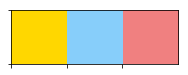

In [78]:
# Establish the color scheme and saved it as a dictionary
# Use the palette function to set and preview the color scheme

color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
sns.palplot(sns.color_palette(color_scheme.values()))
plt.show()

<h4>Part Three: Gather your data </h4>

<ul>
    <li>Gather requested data</li>
    <li>Assign information to new variables</li>
    <li>Create a new DataFrame</li>
    <li>Sort based on Number of Drivers</li>
</ul>

In [80]:
# Group merged_df be city name
city_grouped = merged_df.groupby('city')

In [81]:
# Found the average fare of the city_grouped
# Assigned the mean to a new variable to hold the average fare by city
avg_fare = city_grouped.mean()['fare']

In [82]:
# Found the count of ride_id of the city_grouped
# Assigned the count to a new variable to hold the ride count
ride_count = city_grouped['ride_id'].count()

In [83]:
# Found the average of drivers of the city_grouped
# Assigned the mean to a new variable to hold the number of drivers
drive_count = city_grouped.mean()['driver_count']

In [84]:
# Reset the index for city_df based on city and type
# Assigned the the reset to hold data

city_type = city_df.set_index('city')['type']

In [85]:
# Create a dataframe from above information
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": drive_count,
    "Type of City": city_type
})

In [89]:
# Sort your new dataframe appropriately 
# Print the new dataframe
city_info.sort_values('Number of Drivers', ascending = False)
city_info.head()

,Average Fare,Number of Drivers,Number of Rides,Type of City
Alvarezhaven,23.928710,21.0,31,Urban
Alyssaberg,20.609615,67.0,26,Urban
Anitamouth,37.315556,16.0,9,Suburban
Antoniomouth,23.625000,21.0,22,Urban
Aprilchester,21.981579,49.0,19,Urban


<h4>Part Four: Create the Bubble Chart</h4>

<ul>
    <li>Seperate out the DataFrames by city category</li>
    <li>Set-Up your colors and plot your scatter plots</li>
    <li>Label your title, x-axis, and y-axis</li>
    <li>Create your legend</li>
</ul>

In [87]:
# Now, created separated dataframes for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

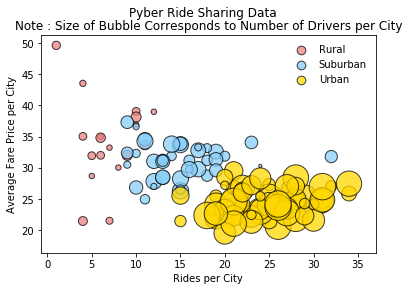

In [88]:
# Establish Color 
city_colors = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 
               'Rural': color_scheme['Light Coral']}

# Prints the bubble plot Note
plt.suptitle('Pyber Ride Sharing Data')

# Create three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, 
            color = city_colors['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, 
            color = city_colors['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, 
            color = city_colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

# Next, print scatter plot with labeled x- and y-axis, as well as title
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Rides per City')
plt.ylabel('Average Fare Price per City')


# Creates the scatter plot legend
lgnd = plt.legend(frameon = True, edgecolor = 'white')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Shows Bubble Plot
plt.show()

<h4>Part Five: Fares by City Type</h4>

<ul>
    <li>Re-Group data and find the total average fare</li>
    <li>Set-Up your colors and plot your scatter plots</li>
    <li>Set the explode values</li>
    <li>Label your pie chart</li>
    <li>Plot the chart</li>
</ul>

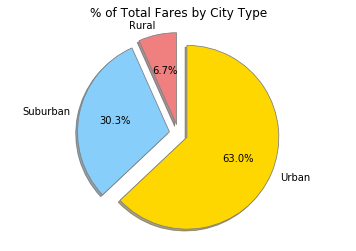

In [75]:
# Next, group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

# Find the total fare by city
sum_fare = by_type.sum()['fare']

# set your labels pie chart build
labels = sum_fare.index

#colors and exploe the same for all pie charts, reference here
colors = [city_colors[n] for n in labels]
explode = [.1 , .1, .1]
plt.pie(sum_fare, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", 
        shadow = True, wedgeprops = {'linewidth': .8, 'edgecolor': 'grey'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

<h4>Part Six: Rides by City Type</h4>

<ul>
    <li>Using the previous data, cunt the number of rides by ride_id</li>
    <li>Set-Up your colors and plot your scatter plots (from previous portion of code)</li>
    <li>Set the explode values (from previous portion of code)</li>
    <li>Label your pie chart</li>
    <li>Plot the chart</li>
</ul>

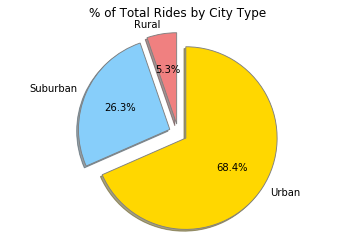

In [76]:
# number of ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, 
        autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .9, 'edgecolor': 'grey'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

<h4>Part Seven: Drivers by City Type</h4>

<ul>
    <li>Using the previous data, cunt the number of rides by ride_id</li>
    <li>Set-Up your colors and plot your scatter plots (from previous portion of code)</li>
    <li>Set the explode values (from previous portion of code)</li>
    <li>Label your pie chart</li>
    <li>Plot the chart</li>
</ul>

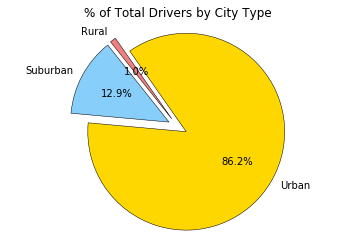

In [77]:
# of driver per city type
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, 
        labels = labels, autopct = "%1.1f%%", wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

<h3>As final considerations:</h3>
<ul>
<li>You must use the Pandas Library and the Jupyter Notebook.</li>
<li>You must use the Matplotlib and Seaborn libraries.</li>
<li>You must include a written description of three observable trends based on the data.</li>
<li>You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.</li>
<li>Remember when making your plots to consider aesthetics!
<li>You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.</li>
<li>When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.</li>
<li>When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.</li>
<li>You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.</li>
<li>See Example Solution for a reference on expected format.</li>
</ul>

<h3>Observations and Analysis</h3>

You must include a written description of three observable trends based on the data.<br>

<ul>
    <li>For all three pie charts, we can see the greatest numbers are from urban areas. This is also reflected in our bubble chart.</li>
    <li>Similarly, the least amount of Pyber data is from rural areas.</li>
    <li>While urban areas have more rides per city, rural and suburban areas have a higher fave average.</li>
</ul>